In [1]:
print("Hello World")

Hello World


In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    skin_files = np.array(data['filenames'])
    skin_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return skin_files, skin_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('data/train')
valid_files, valid_targets = load_dataset('data/valid')
test_files, test_targets = load_dataset('data/test')

# load list of skin names
skin_names = [item[20:-1] for item in sorted(glob("data/train/*/"))]

# print statistics about the dataset
print('There are %d total skin categories.' % len(skin_names))
print('There are %s total skin images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training skin images.' % len(train_files))
print('There are %d validation skin images.' % len(valid_files))
print('There are %d test skin images.'% len(test_files))

Using TensorFlow backend.


There are 3 total skin categories.
There are 2750 total skin images.

There are 2000 training skin images.
There are 150 validation skin images.
There are 600 test skin images.



## Step 1: Detect Human Eyes

We use OpenCV's implementation of Haar feature-based cascade classifiers to detect human faces in images. OpenCV provides many pre-trained face detectors, stored as XML files on github. We have downloaded one of these detectors and stored it in the haarcascades directory.
In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of eyes detected: 2


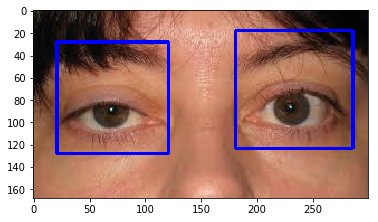

In [11]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# load filenames in shuffled human dataset
human_files = np.array(glob("data/eyes/*"))

# extract pre-trained eye detector
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_lefteye_2splits.xml')

# load color (BGR) image
img = cv2.imread(human_files[1])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find eyes in image
eyes = eye_cascade.detectMultiScale(gray)

# print number of eyes detected in the image
print('Number of eyes detected:', len(eyes))

# get bounding box for each detected eye
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()